In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

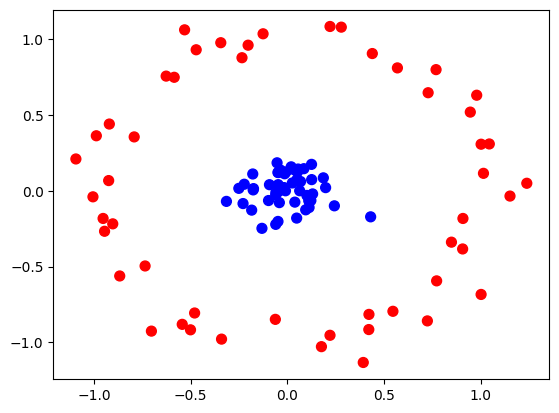

In [3]:
# Parameters
n_samples = 100
factor = 0.1
noise = 0.1

# Generate small circle
theta_small = np.linspace(0, 2 * np.pi, n_samples // 2)
x_small = factor * np.cos(theta_small) + noise * np.random.randn(n_samples // 2)
y_small = factor * np.sin(theta_small) + noise * np.random.randn(n_samples // 2)

# Generate large circle
theta_large = np.linspace(0, 2 * np.pi, n_samples // 2)
x_large = np.cos(theta_large) + noise * np.random.randn(n_samples // 2)
y_large = np.sin(theta_large) + noise * np.random.randn(n_samples // 2)

# Combine the small and large circles
X = np.vstack((np.hstack((x_small, x_large)), np.hstack((y_small, y_large)))).T
y = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [7]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_3176\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


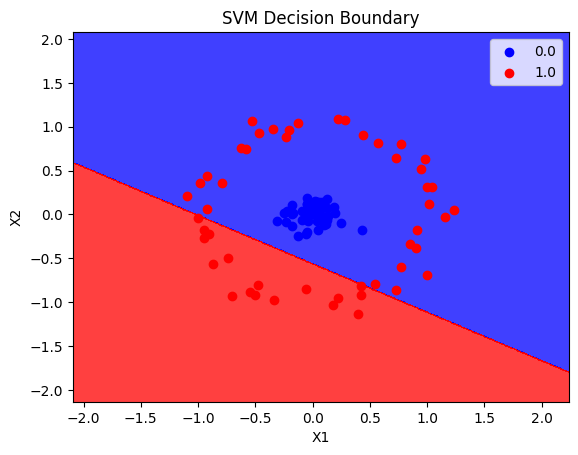

In [8]:
plot_decision_boundary(X, y, classifier)

In [9]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

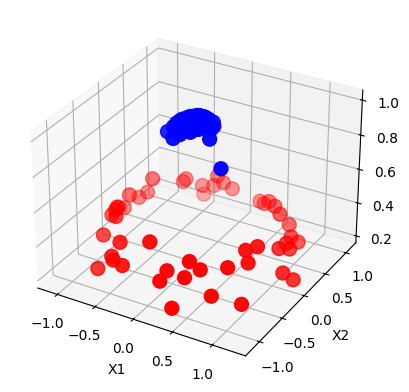

In [10]:
plot_3d_plot(X,y)

In [11]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\A\AppData\Local\Temp\ipykernel_3176\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


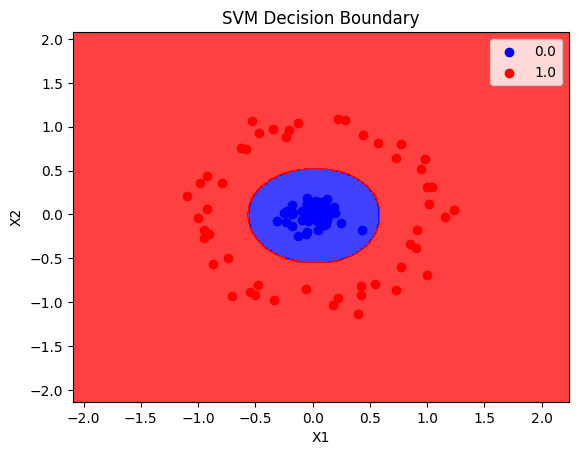

In [13]:
plot_decision_boundary(X, y, rbf_classifier)

In [14]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\A\AppData\Local\Temp\ipykernel_3176\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


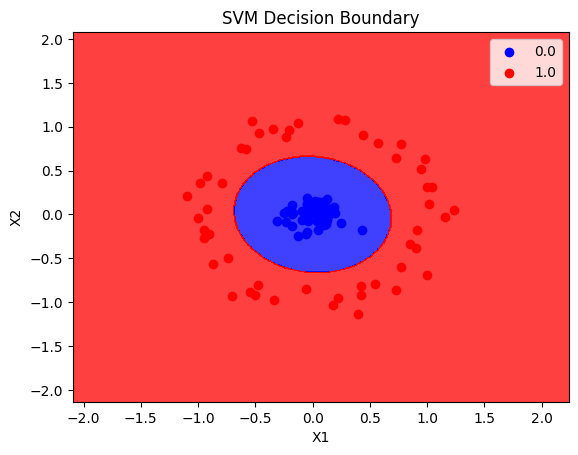

In [16]:
plot_decision_boundary(X, y, poly_classifier)

In [17]:
X

array([[ 1.98020152e-01,  2.16285117e-02],
       [-1.38512552e-02,  1.13186778e-01],
       [ 1.25813109e-01,  7.44877631e-02],
       [ 4.30842832e-01, -1.71190823e-01],
       [ 1.01214707e-01, -3.00216794e-02],
       [ 4.84158641e-02, -1.79470939e-01],
       [ 4.17663007e-02,  1.36598676e-01],
       [ 5.11155828e-02,  7.74862137e-02],
       [ 1.25245975e-01,  1.75248731e-01],
       [-7.08956991e-03,  1.25296956e-01],
       [ 2.00137141e-02,  1.58865321e-01],
       [-4.56157310e-02,  1.21350888e-01],
       [-5.29038813e-02,  1.85500846e-01],
       [-2.50610758e-01,  1.68555092e-02],
       [ 5.58822502e-02,  1.44366691e-01],
       [ 2.47568035e-02,  1.44974208e-01],
       [ 5.32095126e-02,  1.26703324e-01],
       [-3.46049655e-02,  1.36756749e-01],
       [ 2.60420351e-02,  5.24194976e-02],
       [ 8.56181003e-02,  1.46660248e-01],
       [-9.22214409e-02,  4.10018659e-02],
       [-9.52107767e-03,  8.05391636e-04],
       [-6.00669076e-02, -2.65909390e-02],
       [-1.

In [18]:
np.exp(-(X**2)).sum(1)

array([1.96107918, 1.98707863, 1.97876262, 1.80170352, 1.98890698,
       1.96596204, 1.9797709 , 1.99140448, 1.95419055, 1.984373  ,
       1.97467716, 1.98330323, 1.96337984, 1.93884181, 1.97625599,
       1.9785891 , 1.98124719, 1.98027461, 1.99657801, 1.97141679,
       1.98985153, 1.9999087 , 1.99569164, 1.96932165, 1.96968233,
       1.94974958, 1.95782907, 1.90092625, 1.95618381, 1.9487706 ,
       1.95066041, 1.98657978, 1.94200773, 1.99233495, 1.92371637,
       1.9812173 , 1.98292642, 1.97545674, 1.99150416, 1.99608303,
       1.97551917, 1.99924547, 1.98262234, 1.99784212, 1.93286675,
       1.9930098 , 1.99591444, 1.99642185, 1.95850016, 1.98355451,
       1.26460135, 1.34424932, 1.27595235, 1.24451183, 1.05444421,
       1.17162482, 1.0804056 , 1.24562032, 1.24041697, 1.26382061,
       1.26021369, 1.23586531, 1.32547833, 1.40820866, 1.35613923,
       1.27243136, 1.22071935, 1.07712515, 1.23864204, 1.28016359,
       1.25186546, 1.41514791, 1.25322076, 1.25939022, 1.42156

In [19]:
X_new=np.exp(-(X**2))

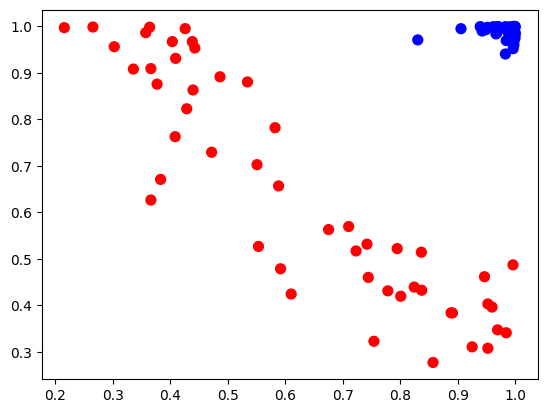

In [20]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')